ATS ANDHIKA PRATAMA (4212201096)

#IMPORT LIBRARY

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from skimage.feature import hog
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# PEMANGGILAN DATASETS

In [8]:
data_latih = pd.read_csv('/content/emnist-bymerge-train.csv')
data_uji = pd.read_csv('/content/emnist-bymerge-test.csv')

PEMBAGIAN SAMPEL DAN MERUBAH JENIS FILE DARI BINER KE IMAGE

In [9]:
x_latih = data_latih.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_latih = data_latih.iloc[:, 0].values.astype('int')
x_uji = data_uji.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_uji = data_uji.iloc[:, 0].values.astype('int')


In [10]:
sampel_maximum = 1000
if len(x_latih) > sampel_maximum:
    x_latih = x_latih[:sampel_maximum]
    y_latih = y_latih[:sampel_maximum]

if len(x_uji) > sampel_maximum:
    x_uji = x_uji[:sampel_maximum]
    y_uji = y_uji[:sampel_maximum]

#EKSTRAKSI DATASET DENGAN HOG

In [13]:
hog_features_latih = []
hog_images_latih = []
for img in x_latih:
    feature, hog_image = hog(img.reshape((28, 28)),
                             orientations=9,
                             pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2),
                             visualize=True,
                             block_norm='L2')

    hog_features_latih.append(feature)
    hog_images_latih.append(hog_image)

In [14]:
hog_features_uji = []
hog_images_uji = []
for img in x_uji:
    feature, hog_image = hog(img.reshape((28, 28)),
                             orientations=9,
                             pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2),
                             visualize=True,
                             block_norm='L2')

    hog_features_uji.append(feature)
    hog_images_uji.append(hog_image)

MENGUBAH KE DALAM BENTU NP

In [22]:
hog_features_uji_np = np.array(hog_features_uji)
hog_images_uji_np= np.array(hog_images_uji)
hog_features_latih_np = np.array(hog_features_latih)
hog_images_latih_np = np.array(hog_images_latih)

NORMALISASI DATA HOG

In [23]:
scaler = StandardScaler()
hog_features_latih_scaled= scaler.fit_transform(hog_features_latih_np)
hog_features_uji_scaled = scaler.transform(hog_features_uji_np)

KLASIFIKASI DATA DENGAN SVM

In [24]:
clasifikasi = svm.SVC(kernel='rbf', C=1, gamma = 'scale')


PERHITUNGAN DENGAN LOOVC BERUPA CONFUSION MATRIX, ACCURACY, PRECISION, RECALL, DAN F1-SCORE

In [26]:
leave_o_o = LeaveOneOut()
predict_y = cross_val_predict(clasifikasi, hog_features_latih_scaled, y_latih, cv=leave_o_o)

In [27]:
leave_o_o_confusion_matrix = confusion_matrix(y_latih, predict_y)
leave_o_o_accuracy = accuracy_score(y_latih, predict_y)
leave_o_o_precision = precision_score(y_latih, predict_y, average='weighted')
leave_o_o_recall = recall_score(y_latih, predict_y, average='weighted')
leave_o_o_f1_score = f1_score(y_latih, predict_y, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
print("\n Hasil dari LOOCV (data training) :")
print("Confusion Matrix:")
print(leave_o_o_confusion_matrix)
print("Accuracy:", leave_o_o_accuracy)
print("Precision:", leave_o_o_precision)
print("Recall:", leave_o_o_recall)
print("F1-Score:", leave_o_o_f1_score)


 Hasil dari LOOCV (data training) :
Confusion Matrix:
[[41  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 16  1]
 [ 0  0  1 ...  0  0 16]]
Accuracy: 0.623
Precision: 0.5603909280503108
Recall: 0.623
F1-Score: 0.5690858317195446


#MENAMPILKAN TABEL MATRIKS

In [33]:
def plot_confusion_mat(cm):
  fig, ax = plt.subplots(figsize=(10, 10))
  plot_confusion_matrix(conf_mat-cm, ax-ax, cmap-plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.xlabel('label prediksi')
  plt.ylabel('label aktual')
  plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

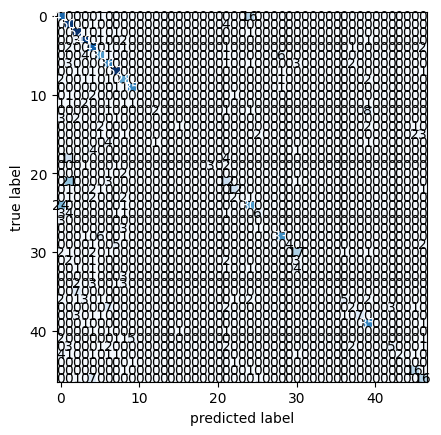

In [34]:
plot_confusion_matrix(leave_o_o_confusion_matrix)


#MEMBANDINGKAN GAMBAR ORIGINAL DENGAN GAMBAR HASIL HOG

In [35]:
def plot_with_HOG(x_uji, hog_images_uji, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(10, 5))
    fig.suptitle(title)

    # Plot  gambar asli
    for i in range(min(len(x_uji), 10)):
        axes[0, i].imshow(x_uji[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot gambar hasil HOG extraction
    for i in range(min(len(hog_images_uji), 10)):
        axes[1, i].imshow(hog_images_uji[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

In [36]:
def gambar_hog_ekstrak(img):
  hog_images = []
  for image in img:
    _, hog_img = hog(image.reshape((28, 28)),
                     orientations=9,
                     pixels_per_cell=(8, 8),
                     cells_per_block=(2, 2),
                     visualize=True,
                     block_norm='L2')
    hog_images.append(hog_img)
  return np.array(hog_images)

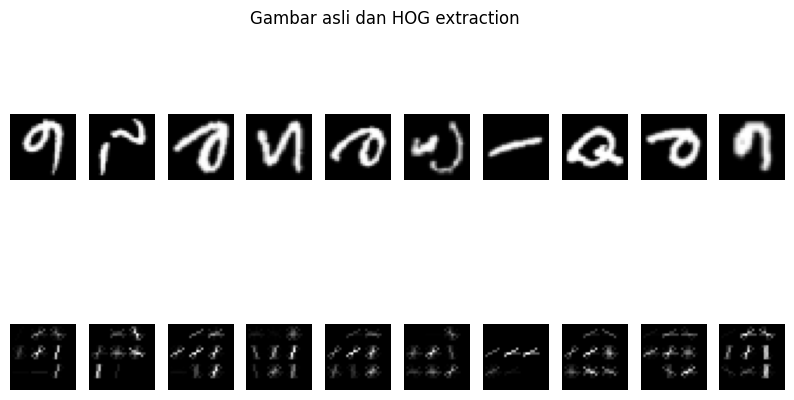

In [38]:
hog_images_latih = gambar_hog_ekstrak(x_latih)

plot_with_HOG(x_latih, hog_images_latih, "Gambar asli dan HOG extraction")